In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os 
import seaborn as sns
import time 
import pickle 
import warnings
from tqdm import tqdm
from PIL import Image
from datetime import datetime

In [201]:
with open("../btc_usd_1d.pkl", "rb") as f:
    df = pickle.load(f)
df.reset_index(inplace=True)
df

,ot,o,h,l,c,v
0,2014-11-29,376.42,386.60,372.25,376.72,2.746157e+06
1,2014-11-30,376.57,381.99,373.32,373.34,1.145567e+06
2,2014-12-01,376.40,382.31,373.03,378.39,2.520662e+06
3,2014-12-02,378.39,382.86,375.23,379.25,2.593576e+06
4,2014-12-03,379.25,383.00,374.23,376.67,2.998358e+06
...,...,...,...,...,...,...
2609,2022-01-20,41733.21,43518.69,40554.14,40736.05,2.425153e+03
2610,2022-01-21,40654.72,41115.58,35423.00,36495.46,6.201046e+03
2611,2022-01-22,36447.37,36825.98,34000.00,35091.11,4.510372e+03
2612,2022-01-23,35084.79,36574.47,34624.59,36293.62,2.533704e+03


In [202]:
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df

,Date,Open,High,Low,Close,Volume
0,2014-11-29,376.42,386.60,372.25,376.72,2.746157e+06
1,2014-11-30,376.57,381.99,373.32,373.34,1.145567e+06
2,2014-12-01,376.40,382.31,373.03,378.39,2.520662e+06
3,2014-12-02,378.39,382.86,375.23,379.25,2.593576e+06
4,2014-12-03,379.25,383.00,374.23,376.67,2.998358e+06
...,...,...,...,...,...,...
2609,2022-01-20,41733.21,43518.69,40554.14,40736.05,2.425153e+03
2610,2022-01-21,40654.72,41115.58,35423.00,36495.46,6.201046e+03
2611,2022-01-22,36447.37,36825.98,34000.00,35091.11,4.510372e+03
2612,2022-01-23,35084.79,36574.47,34624.59,36293.62,2.533704e+03


In [203]:
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Volume
Date,,,,,
2014-11-29,376.42,386.60,372.25,376.72,2.746157e+06
2014-11-30,376.57,381.99,373.32,373.34,1.145567e+06
2014-12-01,376.40,382.31,373.03,378.39,2.520662e+06
2014-12-02,378.39,382.86,375.23,379.25,2.593576e+06
2014-12-03,379.25,383.00,374.23,376.67,2.998358e+06
...,...,...,...,...,...
2022-01-20,41733.21,43518.69,40554.14,40736.05,2.425153e+03
2022-01-21,40654.72,41115.58,35423.00,36495.46,6.201046e+03
2022-01-22,36447.37,36825.98,34000.00,35091.11,4.510372e+03


In [204]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2614 entries, 2014-11-29 to 2022-01-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2614 non-null   float64
 1   High    2614 non-null   float64
 2   Low     2614 non-null   float64
 3   Close   2614 non-null   float64
 4   Volume  2614 non-null   float64
dtypes: float64(5)
memory usage: 122.5 KB
None


In [205]:
import FinanceDataReader as fdr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tqdm import tqdm 

import warnings
warnings.filterwarnings('ignore')

In [206]:
start_date = '20150104'
end_date = '20211214'
DJI_df = fdr.DataReader('dji', start_date, end_date).reset_index()
DJI_df

,Date,Close,Open,High,Low,Volume,Change
0,2015-01-05,17501.65,17821.30,17821.30,17475.93,116160000.0,-0.0186
1,2015-01-06,17371.64,17504.18,17581.05,17262.37,101870000.0,-0.0074
2,2015-01-07,17584.52,17374.78,17597.08,17374.78,91030000.0,0.0123
3,2015-01-08,17907.87,17591.97,17916.04,17591.97,114890000.0,0.0184
4,2015-01-09,17737.37,17911.02,17915.32,17686.09,93390000.0,-0.0095
...,...,...,...,...,...,...,...
1745,2021-12-08,35754.75,35716.85,35840.52,35602.65,387650000.0,0.0010
1746,2021-12-09,35754.69,35722.26,35864.24,35577.14,353020000.0,-0.0000
1747,2021-12-10,35970.99,35830.55,35982.69,35710.43,361200000.0,0.0060
1748,2021-12-13,35650.95,35958.93,35958.93,35609.53,451590000.0,-0.0089


In [207]:
EXC = fdr.DataReader('USD/KRW', start_date, end_date).reset_index()
EXC

,Date,Close,Open,High,Low,Change
0,2015-01-05,1109.93,1106.90,1112.60,1105.16,0.0027
1,2015-01-06,1099.00,1109.93,1110.20,1096.75,-0.0098
2,2015-01-07,1098.74,1099.00,1103.95,1095.10,-0.0002
3,2015-01-08,1095.51,1098.74,1102.00,1094.89,-0.0029
4,2015-01-09,1085.82,1095.51,1097.10,1085.32,-0.0088
...,...,...,...,...,...,...
1807,2021-12-08,1175.19,1176.85,1179.31,1175.12,-0.0013
1808,2021-12-09,1178.15,1173.42,1179.37,1172.62,0.0025
1809,2021-12-10,1180.86,1178.27,1182.82,1176.40,0.0023
1810,2021-12-13,1184.91,1180.96,1186.16,1177.03,0.0034


In [208]:
!pip install pandas_ta
import pandas_ta

In [209]:
#df.ta.log_return(cumulative=True, append=True)
#df.ta.percent_return(cumulative=True, append=True)
#df.columns

In [212]:
df.ta.strategy()

131it [00:03, 41.58it/s]


In [213]:
df.head()

,Open,High,Low,Close,Volume,ABER_ZG_5_15,ABER_SG_5_15,ABER_XG_5_15,ABER_ATR_5_15,ACCBL_20,...,VIDYA_14,VTXP_14,VTXM_14,VWAP_D,VWMA_10,WCP,WILLR_14,WMA_10,ZL_EMA_10,ZS_30
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-29,376.42,386.60,372.25,376.72,2746157.05,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,378.523333,NaN,378.0725,NaN,NaN,NaN,NaN
2014-11-30,376.57,381.99,373.32,373.34,1145566.61,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,376.216667,NaN,375.4975,NaN,NaN,NaN,NaN
2014-12-01,376.40,382.31,373.03,378.39,2520662.37,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,377.910000,NaN,378.0300,NaN,NaN,NaN,NaN
2014-12-02,378.39,382.86,375.23,379.25,2593576.46,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,379.113333,NaN,379.1475,NaN,NaN,NaN,NaN
2014-12-03,379.25,383.00,374.23,376.67,2998357.92,377.946,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,377.966667,NaN,377.6425,NaN,NaN,NaN,NaN


In [224]:
predict_df = df.drop(['Open','Close'],axis=1)
predict_df

,High,Low,Volume,ABER_ZG_5_15,ABER_SG_5_15,ABER_XG_5_15,ABER_ATR_5_15,ACCBL_20,ACCBM_20,ACCBU_20,...,VIDYA_14,VTXP_14,VTXM_14,VWAP_D,VWMA_10,WCP,WILLR_14,WMA_10,ZL_EMA_10,ZS_30
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-29,386.60,372.25,2.746157e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,378.523333,NaN,378.0725,NaN,NaN,NaN,NaN
2014-11-30,381.99,373.32,1.145567e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,376.216667,NaN,375.4975,NaN,NaN,NaN,NaN
2014-12-01,382.31,373.03,2.520662e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,377.910000,NaN,378.0300,NaN,NaN,NaN,NaN
2014-12-02,382.86,375.23,2.593576e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,379.113333,NaN,379.1475,NaN,NaN,NaN,NaN
2014-12-03,383.00,374.23,2.998358e+06,377.946000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,377.966667,NaN,377.6425,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-20,43518.69,40554.14,2.425153e+03,42189.584000,44234.796155,40144.371845,2045.212155,38639.642871,43323.6910,48317.385371,...,46026.624556,0.928271,1.010188,41602.960000,42490.807716,41386.2325,-75.960871,42221.791818,41458.269479,-1.340790
2022-01-21,41115.58,35423.00,6.201046e+03,41110.634000,43399.004011,38822.263989,2288.370011,37746.692880,42759.5930,48407.310380,...,45455.421513,0.822013,1.069440,37678.013333,40620.957414,37382.3750,-88.127758,41119.053091,39508.738664,-2.290136
2022-01-22,36825.98,34000.00,4.510372e+03,39702.070667,42026.281344,37377.859989,2324.210677,36973.404537,42146.6375,48008.267037,...,44723.631421,0.783588,1.182284,35305.696667,39124.719066,35252.0500,-89.565087,39874.442364,37380.753453,-2.382943


In [225]:
def gen_train_test(df):
    df['y_true'] = 0
    for i in range(len(df) - 1):
        df['y_true'].iloc[i] = df['High'].iloc[i+1]

gen_train_test(predict_df)
predict_df

,High,Low,Volume,ABER_ZG_5_15,ABER_SG_5_15,ABER_XG_5_15,ABER_ATR_5_15,ACCBL_20,ACCBM_20,ACCBU_20,...,VTXP_14,VTXM_14,VWAP_D,VWMA_10,WCP,WILLR_14,WMA_10,ZL_EMA_10,ZS_30,y_true
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-29,386.60,372.25,2.746157e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,378.523333,NaN,378.0725,NaN,NaN,NaN,NaN,381.99
2014-11-30,381.99,373.32,1.145567e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,376.216667,NaN,375.4975,NaN,NaN,NaN,NaN,382.31
2014-12-01,382.31,373.03,2.520662e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,377.910000,NaN,378.0300,NaN,NaN,NaN,NaN,382.86
2014-12-02,382.86,375.23,2.593576e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,379.113333,NaN,379.1475,NaN,NaN,NaN,NaN,383.00
2014-12-03,383.00,374.23,2.998358e+06,377.946000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,377.966667,NaN,377.6425,NaN,NaN,NaN,NaN,378.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-20,43518.69,40554.14,2.425153e+03,42189.584000,44234.796155,40144.371845,2045.212155,38639.642871,43323.6910,48317.385371,...,0.928271,1.010188,41602.960000,42490.807716,41386.2325,-75.960871,42221.791818,41458.269479,-1.340790,41115.58
2022-01-21,41115.58,35423.00,6.201046e+03,41110.634000,43399.004011,38822.263989,2288.370011,37746.692880,42759.5930,48407.310380,...,0.822013,1.069440,37678.013333,40620.957414,37382.3750,-88.127758,41119.053091,39508.738664,-2.290136,36825.98
2022-01-22,36825.98,34000.00,4.510372e+03,39702.070667,42026.281344,37377.859989,2324.210677,36973.404537,42146.6375,48008.267037,...,0.783588,1.182284,35305.696667,39124.719066,35252.0500,-89.565087,39874.442364,37380.753453,-2.382943,36574.47


In [226]:
predict_df2 = predict_df.dropna(axis=1, how='any')
predict_df2

,High,Low,Volume,AD,AMATe_LR_8_21_2,AMATe_SR_8_21_2,OBV,AOBV_LR_2,AOBV_SR_2,BOP,...,TOS_STDEVALL_LR,TOS_STDEVALL_L_1,TOS_STDEVALL_U_1,TOS_STDEVALL_L_2,TOS_STDEVALL_U_2,TOS_STDEVALL_L_3,TOS_STDEVALL_U_3,TTM_TRND_6,WCP,y_true
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-29,386.60,372.25,2.746157e+06,-1.035311e+06,0,0,2.746157e+06,0,0,0.020906,...,-9678.166369,-25721.233130,6364.900391,-41764.299891,22407.967152,-57807.366652,38451.033913,-1,378.0725,381.99
2014-11-30,381.99,373.32,1.145567e+06,-2.175592e+06,0,0,1.600590e+06,0,0,-0.372549,...,-9662.093762,-25705.160523,6380.972999,-41748.227284,22424.039760,-57791.294045,38467.106521,-1,375.4975,382.31
2014-12-01,382.31,373.03,2.520662e+06,-1.784455e+06,0,0,4.121253e+06,0,0,0.214440,...,-9646.021155,-25689.087916,6397.045606,-41732.154677,22440.112367,-57775.221437,38483.179128,-1,378.0300,382.86
2014-12-02,382.86,375.23,2.593576e+06,-1.645088e+06,0,0,6.714829e+06,0,0,0.112713,...,-9629.948547,-25673.015308,6413.118213,-41716.082069,22456.184974,-57759.148830,38499.251735,-1,379.1475,383.00
2014-12-03,383.00,374.23,2.998358e+06,-2.975033e+06,0,0,3.716471e+06,0,0,-0.294185,...,-9613.875940,-25656.942701,6429.190821,-41700.009462,22472.257582,-57743.076223,38515.324343,-1,377.6425,378.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-20,43518.69,40554.14,2.425153e+03,5.395338e+09,0,1,-3.355438e+08,0,1,-0.336361,...,32255.266177,16212.199416,48298.332938,169.132656,64341.399699,-15873.934105,80384.466460,-1,41386.2325,41115.58
2022-01-21,41115.58,35423.00,6.201046e+03,5.395334e+09,0,1,-3.355500e+08,0,1,-0.730646,...,32271.338785,16228.272024,48314.405545,185.205263,64357.472306,-15857.861498,80400.539067,-1,37382.3750,36825.98
2022-01-22,36825.98,34000.00,4.510372e+03,5.395333e+09,0,1,-3.355545e+08,0,1,-0.479926,...,32287.411392,16244.344631,48330.478153,201.277870,64373.544914,-15841.788891,80416.611675,-1,35252.0500,36574.47


In [234]:
col_dict = {}
col_dict = predict_df2.columns
col_dict

Index(['High', 'Low', 'Volume', 'AD', 'AMATe_LR_8_21_2', 'AMATe_SR_8_21_2',
       'OBV', 'AOBV_LR_2', 'AOBV_SR_2', 'BOP', 'CDL_DOJI_10_0.1', 'CDL_INSIDE',
       'LDECAY_5', 'DEC_1', 'HA_open', 'HA_high', 'HA_low', 'HA_close', 'HL2',
       'HLC3', 'HWM', 'HWU', 'HWL', 'HWMA_0.2_0.1_0.1', 'INC_1', 'MCGD_10',
       'NVI_1', 'OHLC4', 'PSARaf_0.02_0.2', 'PSARr_0.02_0.2', 'PVI_1', 'PVOL',
       'PVR', 'SQZ_ON', 'SQZ_OFF', 'SQZ_NO', 'SQZPRO_ON_WIDE',
       'SQZPRO_ON_NORMAL', 'SQZPRO_ON_NARROW', 'SQZPRO_OFF', 'SQZPRO_NO',
       'SSF_10_2', 'STC_10_12_26_0.5', 'STCstoch_10_12_26_0.5',
       'SUPERTd_7_3.0', 'THERMOl_20_2_0.5', 'THERMOs_20_2_0.5',
       'TOS_STDEVALL_LR', 'TOS_STDEVALL_L_1', 'TOS_STDEVALL_U_1',
       'TOS_STDEVALL_L_2', 'TOS_STDEVALL_U_2', 'TOS_STDEVALL_L_3',
       'TOS_STDEVALL_U_3', 'TTM_TRND_6', 'WCP', 'y_true'],
      dtype='object')

In [235]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
minmax_scaled_predict = minmax_scaler.fit_transform(predict_df2)
minmax_scaled_predict_df = pd.DataFrame(minmax_scaled_predict)
minmax_scaled_predict_df.columns = col_dict
minmax_scaled_predict_df

,High,Low,Volume,AD,AMATe_LR_8_21_2,AMATe_SR_8_21_2,OBV,AOBV_LR_2,AOBV_SR_2,BOP,...,TOS_STDEVALL_LR,TOS_STDEVALL_L_1,TOS_STDEVALL_U_1,TOS_STDEVALL_L_2,TOS_STDEVALL_U_2,TOS_STDEVALL_L_3,TOS_STDEVALL_U_3,TTM_TRND_6,WCP,y_true
0,0.002526,0.003326,3.555681e-03,0.008370,0.0,0.0,0.256727,0.0,0.0,0.510210,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.003004,0.005536
1,0.002459,0.003342,1.483262e-03,0.008169,0.0,0.0,0.256490,0.0,0.0,0.313385,...,0.000383,0.000383,0.000383,0.000383,0.000383,0.000383,0.000383,0.0,0.002965,0.005541
2,0.002464,0.003338,3.263714e-03,0.008238,0.0,0.0,0.257013,0.0,0.0,0.607025,...,0.000765,0.000765,0.000765,0.000765,0.000765,0.000765,0.000765,0.0,0.003003,0.005549
3,0.002472,0.003371,3.358122e-03,0.008263,0.0,0.0,0.257551,0.0,0.0,0.556136,...,0.001148,0.001148,0.001148,0.001148,0.001148,0.001148,0.001148,0.0,0.003020,0.005551
4,0.002474,0.003356,3.882227e-03,0.008029,0.0,0.0,0.256929,0.0,0.0,0.352587,...,0.001531,0.001531,0.001531,0.001531,0.001531,0.001531,0.001531,0.0,0.002997,0.005493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609,0.629563,0.611244,3.140049e-06,0.955715,0.0,1.0,0.186493,0.0,1.0,0.331488,...,0.998469,0.998469,0.998469,0.998469,0.998469,0.998469,0.998469,0.0,0.615069,0.595878
2610,0.594628,0.533614,8.029017e-06,0.955714,0.0,1.0,0.186492,0.0,1.0,0.134248,...,0.998852,0.998852,0.998852,0.998852,0.998852,0.998852,0.998852,0.0,0.555310,0.533710
2611,0.532267,0.512085,5.839959e-06,0.955714,0.0,1.0,0.186491,0.0,1.0,0.259670,...,0.999235,0.999235,0.999235,0.999235,0.999235,0.999235,0.999235,0.0,0.523514,0.530065
2612,0.528611,0.521535,3.280600e-06,0.955714,0.0,1.0,0.186491,0.0,1.0,0.809881,...,0.999617,0.999617,0.999617,0.999617,0.999617,0.999617,0.999617,0.0,0.533880,0.525752


In [244]:
train_df = minmax_scaled_predict_df.iloc[29:2550]
test_df = minmax_scaled_predict_df.iloc[2550:2613]
train_df.reset_index(drop=True,inplace=True)
test_df.reset_index(drop=True,inplace=True)

In [245]:
X_train = train_df.drop(['High', 'y_true'], axis=1,inplace=False)
y_train = train_df['y_true']

X_test=test_df.drop(['High', 'y_true'], axis=1,inplace=False)
y_test=test_df['y_true']

In [249]:
print(X_train.shape)
print(X_test.shape)

(2521, 55)
(63, 55)


In [264]:
model = LinearRegression()
LR = model.fit(X_train, y_train)

In [258]:
y_pred = model.predict(X_test)

Feature: 0, Score: 0.21676
Feature: 1, Score: 0.00892
Feature: 2, Score: -0.00374
Feature: 3, Score: -0.00043
Feature: 4, Score: 0.00043
Feature: 5, Score: -0.00039
Feature: 6, Score: 0.00043
Feature: 7, Score: -0.00043
Feature: 8, Score: 0.00147
Feature: 9, Score: 0.00002
Feature: 10, Score: 0.00007
Feature: 11, Score: 0.09027
Feature: 12, Score: -0.00037
Feature: 13, Score: 0.24515
Feature: 14, Score: 0.19902
Feature: 15, Score: -0.14032
Feature: 16, Score: 0.17433
Feature: 17, Score: -1.65416
Feature: 18, Score: 0.46367
Feature: 19, Score: -0.00463
Feature: 20, Score: 0.05666
Feature: 21, Score: -0.07272
Feature: 22, Score: -0.00463
Feature: 23, Score: -0.00086
Feature: 24, Score: -0.03085
Feature: 25, Score: 0.00797
Feature: 26, Score: 0.17433
Feature: 27, Score: 0.00061
Feature: 28, Score: -0.00015
Feature: 29, Score: -0.00178
Feature: 30, Score: -0.00656
Feature: 31, Score: 0.00064
Feature: 32, Score: -0.00029
Feature: 33, Score: 0.00029
Feature: 34, Score: 0.00000
Feature: 35, S

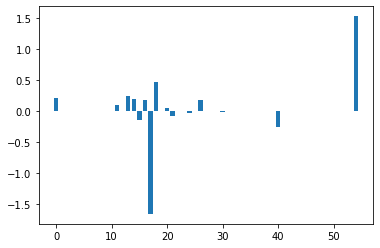

In [252]:
importance = model.coef_
for i,v in enumerate(importance):
    	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

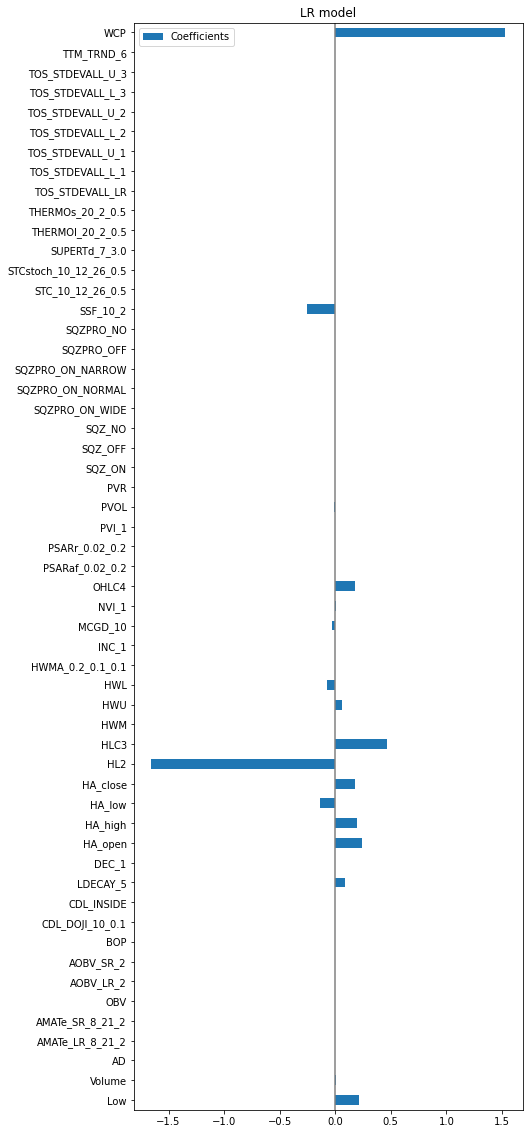

In [262]:
coefs = pd.DataFrame(
   model.coef_,
   columns=['Coefficients'], index=X_train.columns
)

coefs.plot(kind='barh', figsize=(9, 20))
plt.title('LR model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

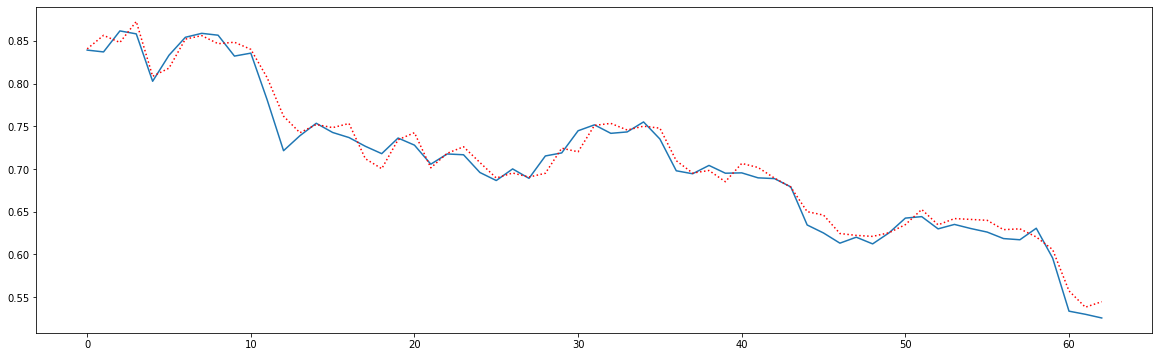

In [263]:
plt.figure(figsize=(20, 6))
plt.plot(y_test)
plt.plot(y_pred, color='red', linestyle=":")

In [259]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.00015611737326928494

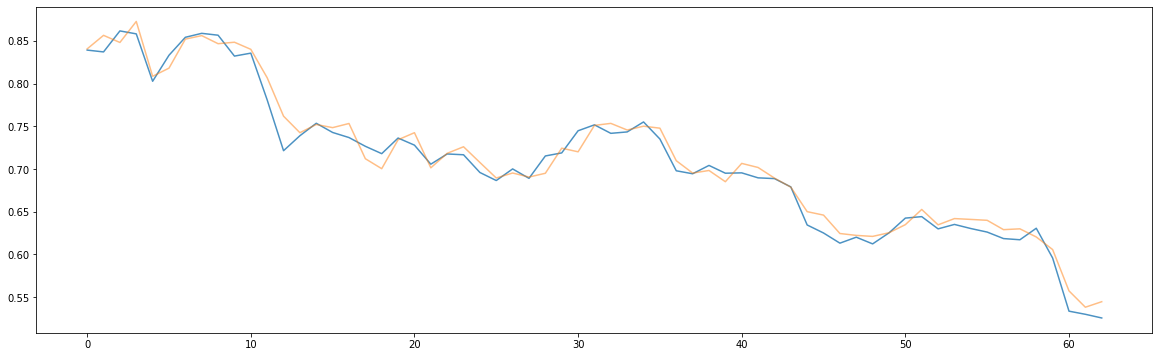

In [295]:
plt.figure(figsize=(20, 6))
plt.plot(pd.Series(y_test), alpha=0.8) # blue
plt.plot(pd.Series(LR.predict(X_test)), alpha=0.5) # green
plt.show()